In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("data/modified_0420.csv")

In [3]:
x_train = df[['int_rate','sub_grade','dti_log','installment','mo_sin_old_rev_tl_op_log','annual_inc_log',
              'revol_util','revol_bal_log','bc_open_to_buy_log','tot_hi_cred_lim_log','mo_sin_old_il_acct_log',
              'tot_cur_bal_log','total_bc_limit_log','total_rev_hi_lim_log','total_bal_ex_mort_log','loan_amnt',
              'total_il_high_credit_limit_log','mths_since_recent_bc_log','total_acc_log','fico_avg']]
y_train = df['loan_status']

In [4]:
nan_indices = np.isnan(x_train).any(axis=1)
x_train = x_train[~nan_indices]
y_train = y_train[~nan_indices]
scale = StandardScaler()
x_scaled = scale.fit_transform(x_train)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

In [5]:
model = RandomForestClassifier()

In [9]:
params = {'n_estimators' : [20, 30, 40],
          'max_depth' : [6, 8, 10, 12],
          'min_samples_leaf' : [8, 12, 18],
          'min_samples_split' : [8, 16, 20]
          }
kfold = KFold(random_state=30,
           n_splits=5,
           shuffle=True
          )
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_search = GridSearchCV(rf_clf, param_grid = params, cv = kfold, n_jobs = -1, scoring='precision')
grid_search.fit(x_train, y_train)

# 최적의 param
print(f"Best params: {grid_search.best_params_}")
# 최적의 param일 경우 최적의 accuracy
print(f"Best average accuracy: {grid_search.best_score_}")

Best params: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 40}
Best average accuracy: 0.6429931853636008


In [10]:
# Best params(accuracy): {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 40}
# Best params(precision): {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 40}

rf_clf1 = RandomForestClassifier(n_estimators = 40,
                                n_jobs = -1,
                                max_depth=8,
                                min_samples_leaf=8,
                                min_samples_split=8)
rf_clf1.fit(x_train, y_train)
train_y_pred = rf_clf1.predict(x_train)
valid_y_pred = rf_clf1.predict(x_validation)

In [11]:
print("train accuracy: {:.3f}".format(accuracy_score(y_train, train_y_pred)))
print("train recall: {:.3f}".format(recall_score(y_train, train_y_pred)))
print("train precision: {:.3f}".format(precision_score(y_train, train_y_pred)))
print("train f1: {:.3f}".format(f1_score(y_train, train_y_pred)))
print("validation accuracy: {:.3f}".format(accuracy_score(y_validation, valid_y_pred)))
print("validation recall: {:.3f}".format(recall_score(y_validation, valid_y_pred)))
print("validation precision: {:.3f}".format(precision_score(y_validation, valid_y_pred)))
print("validation f1: {:.3f}".format(f1_score(y_validation, valid_y_pred)))

train accuracy: 0.798
train recall: 0.004
train precision: 0.679
train f1: 0.007
validation accuracy: 0.798
validation recall: 0.004
validation precision: 0.618
validation f1: 0.007


In [12]:
joblib.dump(model, './statistical_model/random_forest(precision).pkl')

['./statistical_model/random_forest(precision).pkl']

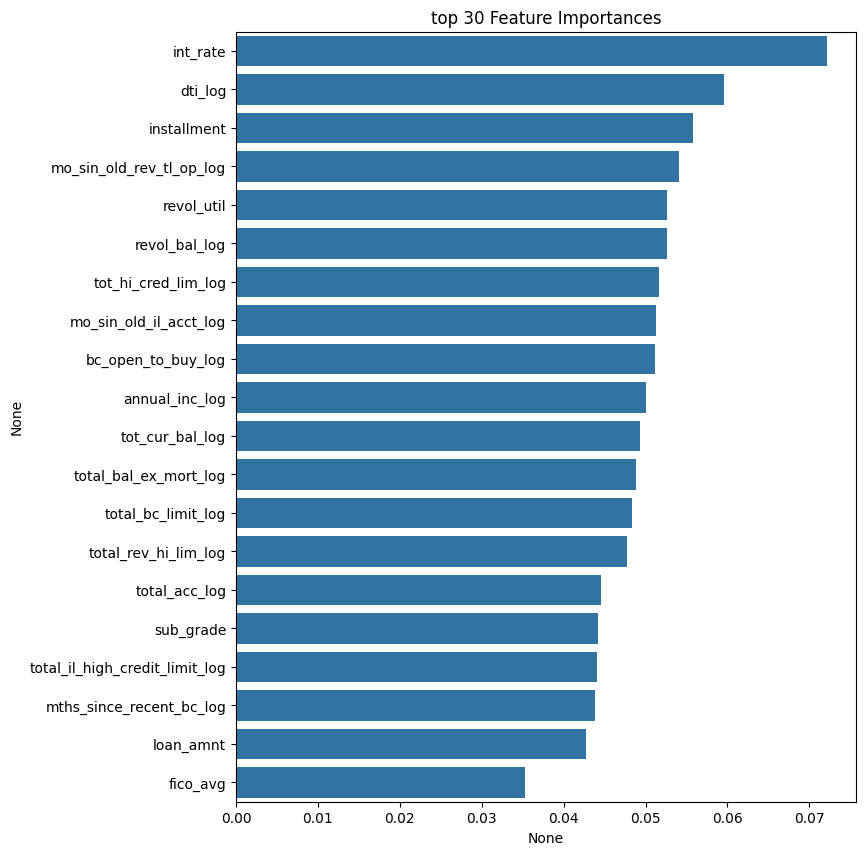

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top30 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,10))
plt.title('top 30 Feature Importances')
sns.barplot(x=ftr_top30, y=ftr_top30.index)
plt.show()

아래는 위의 모델을 생성한 결과를 바탕으로 hyperparameter를 설정한 모델입니다.